In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loaddata():
    data = np.loadtxt('data/data1.txt',delimiter=',')
    n = data.shape[1]-1 #特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

In [3]:
def featureNormalize(X):
    mu = np.average(X,axis=0)
    sigma =np.std(X,axis=0,ddof=1)
    X = (X-mu)/sigma
    return X,mu,sigma

In [4]:
def computeCost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)

In [5]:
def gradientDescent(X,y,theta,iterations,alpha):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)#对原始数据加入一个全为1的列
    m = X.shape[0]
    n = X.shape[1]
    costs = np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j]+(alpha/m)*np.sum(y-np.dot(X,theta)*X[:,j].reshape(-1,1))
        costs[num] = computeCost(X,y,theta)
    return theta,costs

In [6]:
def gradientDescent_ridge(X,y,theta,iterations,alpha,lamda=0.02):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)#对原始数据加入一个全为1的列
    m = X.shape[0]
    n = X.shape[1]
    costs = np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j]+(alpha/m)*np.sum(y-np.dot(X,theta)*X[:,j].reshape(-1,1))-2*lamda*theta[j]
        costs[num] = computeCost(X,y,theta)
    return theta,costs

In [7]:
def predict(X):
    X = (X-mu)/sigma
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X, 0, values=c, axis=1)
    return np.dot(X,theta)

In [8]:
X_orgin,y = loaddata()
X,mu,sigma = featureNormalize(X_orgin)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)
iterations = 400
alpha = 0.01

In [9]:
theta,costs = gradientDescent_ridge(X,y,theta,iterations,alpha,0.01)

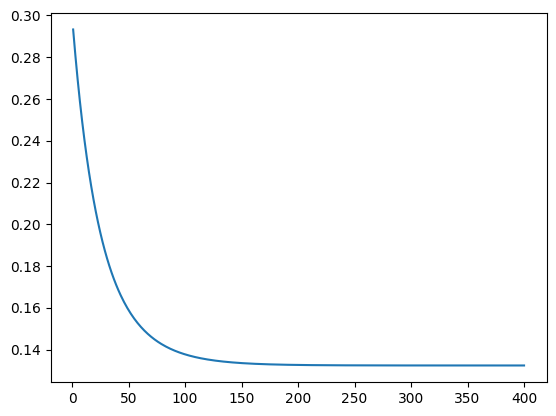

In [10]:
x_axis = np.linspace(1,iterations,iterations)
plt.plot(x_axis,costs[0:iterations])

In [11]:
theta

array([[0.19999898],
       [0.20225245],
       [0.20225246]])

ValueError: x and y must be the same size

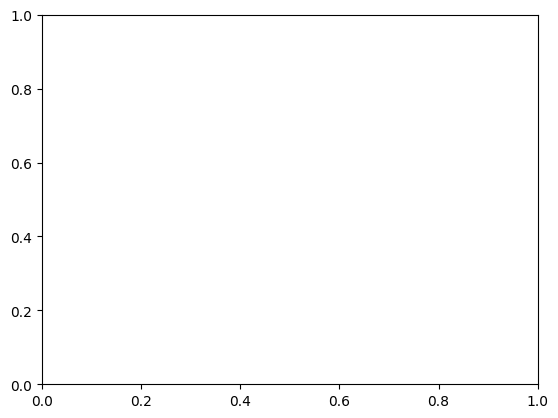

In [12]:
plt.scatter(X,y)
h_theta = theta[0]+theta[1]*X
plt.plot(X,h_theta)

In [13]:
print(predict([[5.5277]]))

[[-1.0854525]]
